In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

from src.nqs import RBM, RandomHamiltonian, IsingHamiltonian, IsingHamiltonianReduced
import src.utils as utils
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook

In [59]:
visible_size = 12

hidden_size = 2*visible_size
walker_steps = 100*visible_size^3
errors = []
seed = 42  # Seed for random number generator
np.random.seed(seed)

H = IsingHamiltonian(n=visible_size)
for i in range(1,51):
    
    rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)


    mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist(0)],
             density=True, 
             bins=range(2**visible_size+1))

    exact= rbm.probability_dist()
    exact = exact.reshape(-1)
    
    errors.append(utils.prob_error(exact, mcmc))
    print(f"Probability error: {errors[-1]}")
print(f"Error mean: {np.mean(errors)}")

Probability error: 0.2614836945856409
Probability error: 0.062677370347434
Probability error: 0.10376184189137362
Probability error: 0.14214199526940874
Probability error: 0.02571495057293894
Probability error: 0.15791188279651241
Probability error: 0.13338322735695693
Probability error: 0.062013146987366166
Probability error: 0.09709153404134276
Probability error: 0.10570408632764938
Probability error: 0.21687666556619375
Probability error: 0.4460149165974203
Probability error: 0.08848084886215409
Probability error: 0.23382824929067725
Probability error: 0.1489119948725624
Probability error: 0.2001530199315776
Probability error: 0.09824576544278925
Probability error: 0.10613181478709391
Probability error: 0.11162176292319853
Probability error: 0.06931340712108225
Probability error: 0.06398050412459341
Probability error: 0.1907829016128799
Probability error: 0.088583266189135
Probability error: 0.17690005597421105
Probability error: 0.1986682459178981
Probability error: 0.0646375466083




12 Visible
warm up 0.14928655173308905
no warm up Error mean: Error mean: 0.16169746157861659

10 Visible
warm up: Error mean: 0.13510840076408567
no warm up: Error mean: 0.146555195085363858

8 visible
warm up Error mean:  0.09924413953182042
no warm up Error mean: 0.1223059239794776

6 visble
warm up Error mean: 0.09206277780762866
no warm up Error mean: 0.09771863868649651

In [61]:
visibles = [6,8,10,12]
warmings= [0.09206277780762866, 0.09924413953182042, 0.13510840076408567, 0.14928655173308905]
coldings = [0.09771863868649651, 0.1223059239794776, 0.146555195085363858, 0.16169746157861659]

<IPython.core.display.Javascript object>


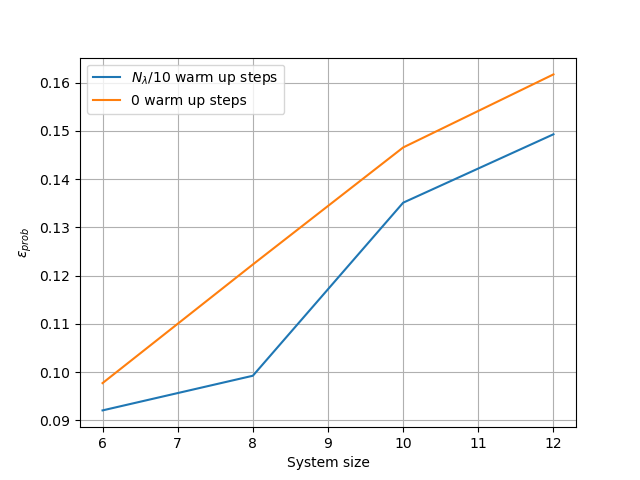

In [65]:
plt.figure(2)

#yint = range(min(), math.ceil(visible_list))+1)
#plt.yticks(yint)
plt.plot(visibles, warmings, label=r"$N_\lambda/10$ warm up steps")
plt.plot(visibles, coldings, label=r"0 warm up steps")
plt.legend()

plt.ylabel(r'$\epsilon_{prob}$')
plt.xlabel("System size")
plt.grid()

In [66]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMC warm up vs no wu.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

In [44]:
visible_size = 5
hidden_size = 2*visible_size
walker_steps = 1000

seed = 28 # Seed for random number generator
np.random.seed(seed)

H = IsingHamiltonian(n=visible_size)

rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=H, walker_steps=walker_steps)


mcmc, _ = np.histogram([utils.binary_array_to_int(state) for state in rbm.mcmc_dist(0)],
         density=True, 
         bins=range(2**visible_size+1))

exact= rbm.probability_dist()
exact = exact.reshape(-1)




<IPython.core.display.Javascript object>


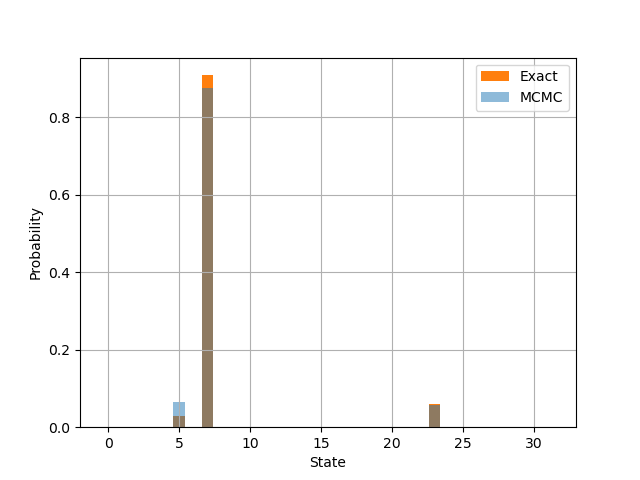

In [47]:
plt.figure(1)
#plt.hist([utils.binary_array_to_int(state) for state in mcmc], 
#         density=True, 
#         bins=range(2**visible_size+1), 
#         edgecolor="white", 
#         align='left', 
#         rwidth = 1,
#         label='MCMC')
plt.bar([x for x in range(2**visible_size)], exact, color='tab:orange')
plt.bar([x for x in range(2**visible_size)], mcmc, color='tab:blue', alpha=0.5)


plt.xlabel('State')
plt.ylabel('Probability')
plt.grid()
plt.legend(['Exact', 'MCMC'])


In [48]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/MCMC histogram plot 1000- no WU.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")